In [38]:
!pip install yfinance
!pip install beautifulsoup4
!pip install lxml
!pip install matplotlib




[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [39]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt


In [115]:
tesla = yf.Ticker("TSLA")
tesla_data = tesla.history(period='max')

In [116]:
tesla_data.reset_index(inplace=True)
tesla_data.head(5)

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


In [117]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

url = "https://finance.yahoo.com/quote/TSLA/history/"
html_data = requests.get(url).text
soup = BeautifulSoup(html_data, "html.parser")

tables = soup.find_all("table")
revenue_data = []


for table in tables:
    if "Tesla Quarterly Revenue" in table.text:
        rows=table.find_all("tr")[1:]
        for row in rows:
            cols = row.find_all("td")
            if len(cols) == 2:
                date = cols[0].text.strip()
                revenue = cols[1].text.strip().replace("$", "").replace(",", "")
                if revenue:
                    revenue_data.append({"Date": date, "Revenue": revenue})

tesla_revenue = pd.DataFrame(revenue_data)

income_stmt = tesla.quarterly_income_stmt
tesla_revenue = income_stmt.loc["Total Revenue"].T.reset_index()
tesla_revenue.columns = ["Date", "Revenue"]
tesla_revenue["Date"] = pd.to_datetime(tesla_revenue["Date"])
tesla_revenue["Revenue"] = tesla_revenue["Revenue"]


In [139]:
tesla_data["Date"] = tesla_data["Date"].dt.tz_localize(None)
tesla_revenue["Date"] = tesla_revenue["Date"].dt.tz_localize(None)

tesla_data.set_index("Date", inplace=True)
tesla_revenue.set_index("Date", inplace=True)

combined = pd.merge(tesla_data, tesla_revenue, on = "Date", how="left")
combined["Revenue"] = combined["Revenue"].fillna(method="ffill")


C:\Users\moksh_61qxc6\AppData\Local\Temp\ipykernel_7376\270118137.py:8: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  combined["Revenue"] = combined["Revenue"].fillna(method="ffill")
C:\Users\moksh_61qxc6\AppData\Local\Temp\ipykernel_7376\270118137.py:8: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  combined["Revenue"] = combined["Revenue"].fillna(method="ffill")


In [136]:
tesla_data.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Dividends',
       'Stock Splits'],
      dtype='object')

In [137]:
tesla_revenue.columns

Index(['Date', 'Revenue'], dtype='object')

In [138]:

def make_graph(stock_data, revenue_data, stock):
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 8))  # two rows, one column

    # Plot 1: Stock Close Price
    ax1.plot(stock_data['Date'], stock_data['Close'], label='Stock Price')
    ax1.set_title(f"{stock} Stock Price Over Time")
    ax1.set_xlabel("Date")
    ax1.set_ylabel("Stock Price (USD)")
    ax1.grid(True)
    ax1.legend()

    # Plot 2: Revenue
    ax2.plot(revenue_data['Date'], revenue_data['Revenue'], color='orange', label='Revenue')
    ax2.set_title(f"{stock} Revenue Over Time")
    ax2.set_xlabel("Date")
    ax2.set_ylabel("Revenue (USD)")
    ax2.grid(True)
    ax2.legend()

    plt.tight_layout()
    plt.show()

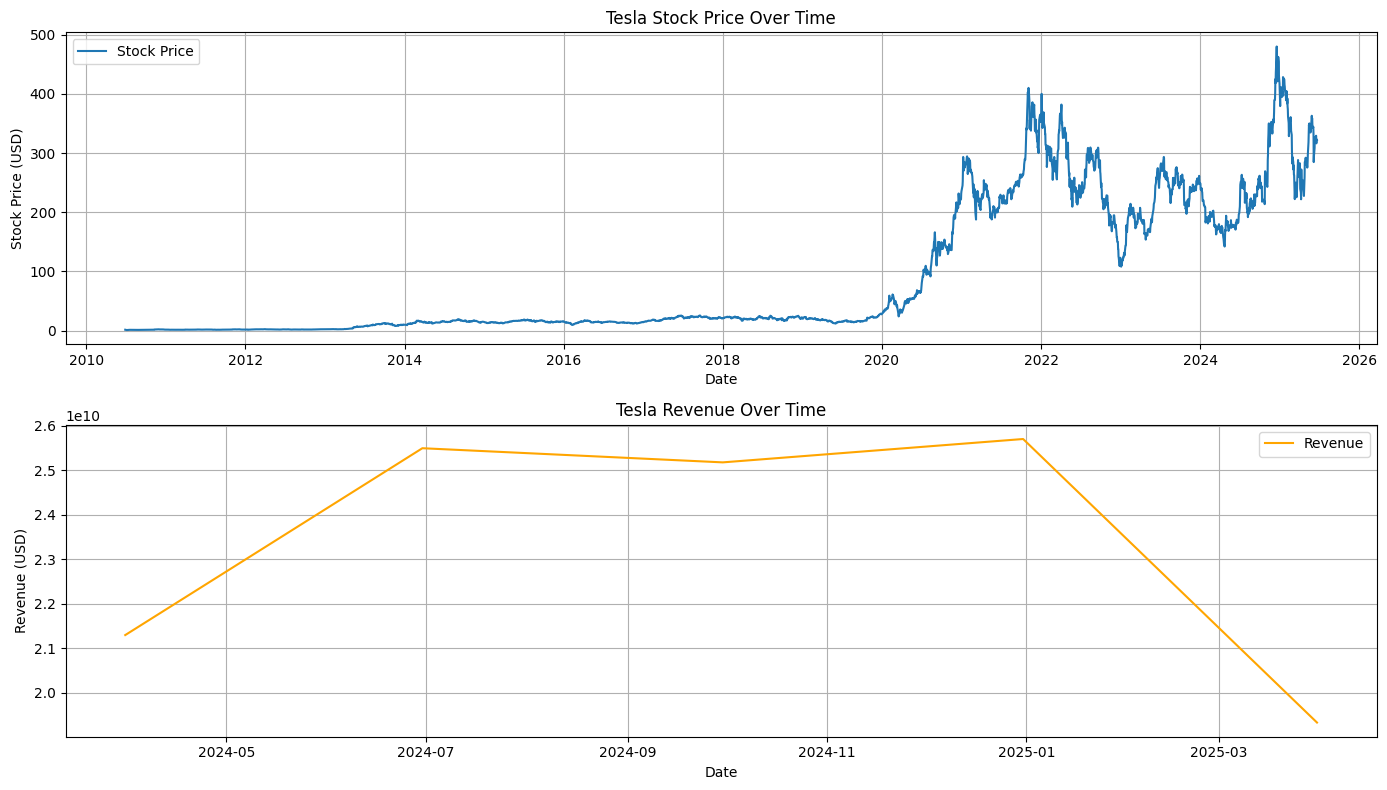

In [135]:
make_graph(tesla_data,tesla_revenue, 'Tesla')

In [142]:
gme = yf.Ticker("GME")

In [143]:
gme_data = gme.history(period = "max")

gme_data.reset_index(inplace=True)
gme_data.head(5)

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13 00:00:00-05:00,1.620128,1.693350,1.603296,1.691666,76216000,0.0,0.0
1,2002-02-14 00:00:00-05:00,1.712707,1.716074,1.670626,1.683251,11021600,0.0,0.0
2,2002-02-15 00:00:00-05:00,1.683251,1.687459,1.658002,1.674834,8389600,0.0,0.0
3,2002-02-19 00:00:00-05:00,1.666418,1.666418,1.578047,1.607504,7410400,0.0,0.0
4,2002-02-20 00:00:00-05:00,1.615921,1.662210,1.603296,1.662210,6892800,0.0,0.0


In [145]:
url = "https://finance.yahoo.com/quote/GME/history/"
html_data = requests.get(url).text
soup = BeautifulSoup(html_data, "html.parser")

tables = soup.find_all("tables")
revenue_data = []

for table in tables:
    if "Gamestop Quarterly Revenue" in table.text:
        rows=table.find_all("tr")[1:]
        for row in rows:
            cols = row.find_all("td")
            if len(cols) == 2:
                date = cols[0].text.strip()
                revenue = cols[1].text.strip().replace("$", "").replace(",", "")
                if revenue:
                    revenue_data.append({"Date": date, "Revenue": revenue})

gme_revenue = pd.DataFrame(revenue_data)
# Get GME quarterly income statement
gme = yf.Ticker("GME")
income_stmt = gme.quarterly_income_stmt

# Extract "Total Revenue" row and transpose
gme_revenue = income_stmt.loc["Total Revenue"].T.reset_index()

# Rename columns to ["Date", "Revenue"]
gme_revenue.columns = ["Date", "Revenue"]

# Ensure 'Date' is datetime
gme_revenue["Date"] = pd.to_datetime(gme_revenue["Date"])

In [146]:
gme_data.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Dividends',
       'Stock Splits'],
      dtype='object')

In [147]:
gme_revenue.columns

Index(['Date', 'Revenue'], dtype='object')

In [148]:
def make_graph(stock_data, revenue_data, stock):
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 8))  # two rows, one column

    # Plot 1: Stock Close Price
    ax1.plot(stock_data['Date'], stock_data['Close'], label='Stock Price')
    ax1.set_title(f"{stock} Stock Price Over Time")
    ax1.set_xlabel("Date")
    ax1.set_ylabel("Stock Price (USD)")
    ax1.grid(True)
    ax1.legend()

    # Plot 2: Revenue
    ax2.plot(revenue_data['Date'], revenue_data['Revenue'], color='orange', label='Revenue')
    ax2.set_title(f"{stock} Revenue Over Time")
    ax2.set_xlabel("Date")
    ax2.set_ylabel("Revenue (USD)")
    ax2.grid(True)
    ax2.legend()

    plt.tight_layout()
    plt.show()

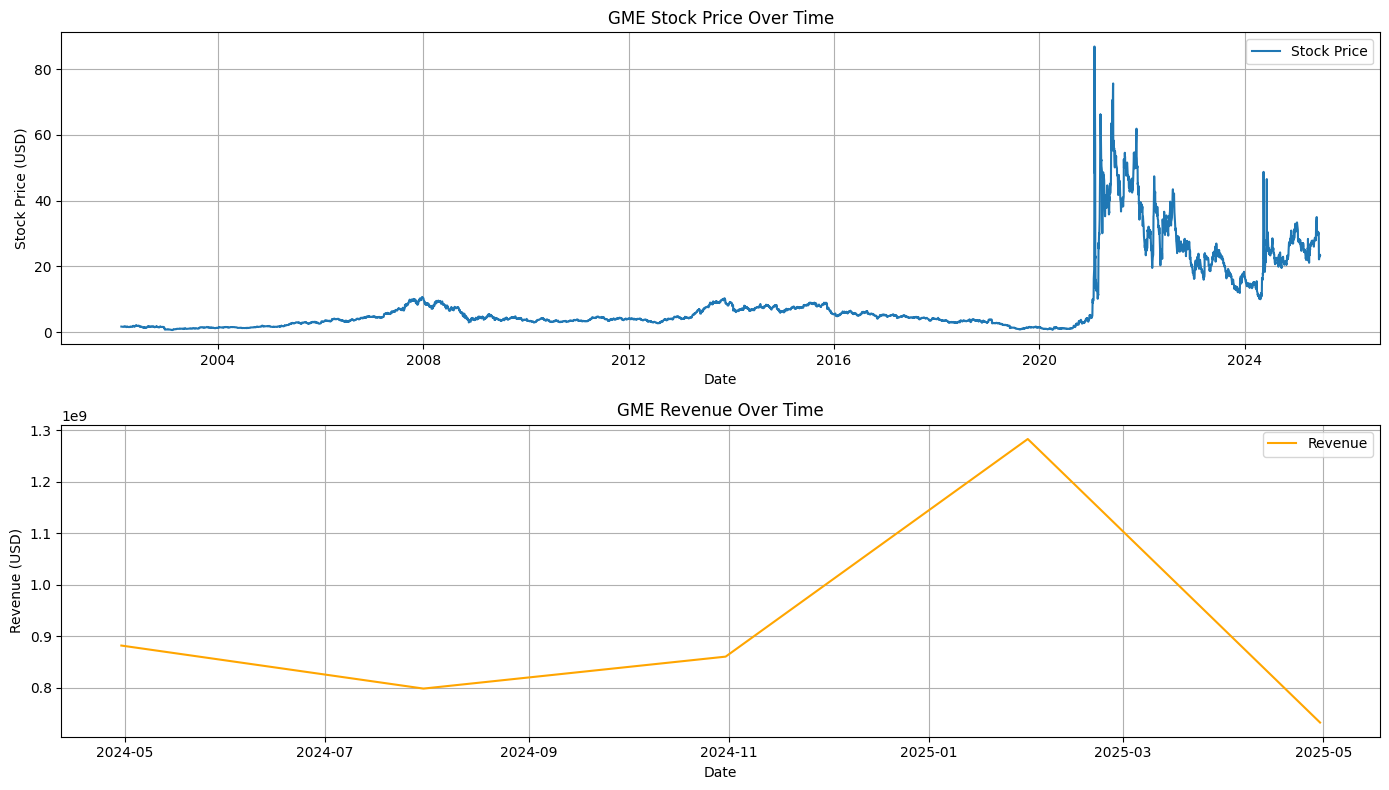

In [149]:
make_graph(gme_data, gme_revenue, 'GME')